Otsu Algorithm

Optimal Threshold:  146


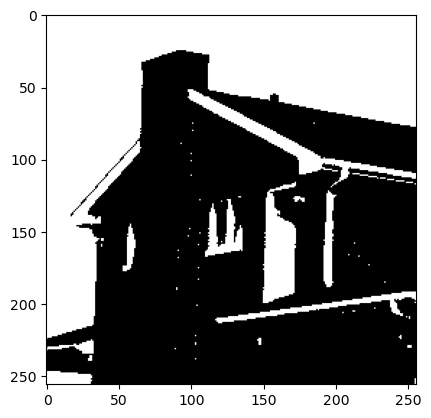

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold_manual(image):
    # 1. 히스토그램 계산
    hist, _ = np.histogram(image.ravel(), 256, [0, 256])
    total_pixels = image.shape[0] * image.shape[1]

    # 2. 초기 조건 계산
    current_max = 0
    threshold = 0
    sum_total = 0
    for t in range(256):
        sum_total += t * hist[t]
        
    weight_bg = 0
    sum_bg = 0

    # 3. 임계값 찾기
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break

        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg

        # Between class variance 계산
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2

        # 최적 임계값 업데이트
        if var_between > current_max:
            current_max = var_between
            threshold = t

    # 4. 이미지 이진화 (직접 픽셀 비교)
    binary_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] > threshold:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0
                
    return binary_image, threshold

imgae_path = './image/house.bmp'
# 테스트를 위해 이미지 읽기
image = cv2.imread(imgae_path, cv2.IMREAD_GRAYSCALE)
binary_image, threshold = otsu_threshold_manual(image)

# 결과 출력
print("Optimal Threshold: ", threshold)
plt.imshow(binary_image, cmap='gray')


Otsu Algorhythm2

이미지 크기: (256, 256)
최적 임계값: 147


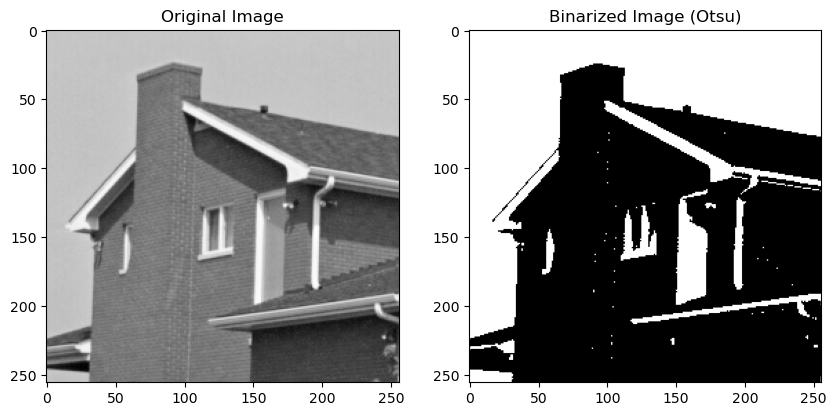

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 로드 (cv2 사용)
def load_image_as_gray(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"이미지를 로드할 수 없습니다: {image_path}")
    return np.array(img, dtype=np.uint8)

# 2. 히스토그램 계산
def compute_histogram(image):
    # 밝기 값 범위: 0~255
    histogram = np.zeros(256, dtype=np.float32)
    h, w = image.shape

    # 각 픽셀의 밝기 값에 대해 히스토그램 계산
    for i in range(h):
        for j in range(w):
            intensity = image[i, j]
            histogram[intensity] += 1

    return histogram

# 3. 오츄 알고리즘으로 임계값 계산
def otsu_thresholding(histogram, total_pixels):
    # 클래스 간 분산 최대화
    max_variance = 0.0
    threshold = 0

    # 1~254까지 임계값 테스트 (0과 255는 클래스 분할 불가)
    for t in range(1, 255):
        # 클래스 0: 0 ~ t-1
        w0 = np.sum(histogram[:t])  # 클래스 0의 픽셀 수
        if w0 == 0:
            continue

        # 클래스 1: t ~ 255
        w1 = np.sum(histogram[t:])  # 클래스 1의 픽셀 수
        if w1 == 0:
            continue

        # 클래스 0의 평균 밝기
        mu0 = np.sum(np.arange(t) * histogram[:t]) / w0
        # 클래스 1의 평균 밝기
        mu1 = np.sum(np.arange(t, 256) * histogram[t:]) / w1

        # 클래스 간 분산 계산: w0 * w1 * (mu0 - mu1)^2
        variance = w0 * w1 * (mu0 - mu1) ** 2

        # 최대 분산 갱신
        if variance > max_variance:
            max_variance = variance
            threshold = t

    return threshold

# 4. 이진화
def binarize_image(image, threshold):
    binarized = np.zeros_like(image, dtype=np.uint8)
    binarized[image >= threshold] = 255  # 임계값 이상은 흰색(255)
    binarized[image < threshold] = 0     # 임계값 미만은 검정(0)
    return binarized

# 5. 결과 시각화
def plot_results(original_img, binarized_img):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Binarized Image (Otsu)")
    plt.imshow(binarized_img, cmap='gray')
    plt.show()

# 6. 메인 실행
if __name__ == "__main__":
    image_path = "./image/house.bmp"  # 실제 이미지 경로로 변경
    gray_image = load_image_as_gray(image_path)
    print(f"이미지 크기: {gray_image.shape}")
    
    # 히스토그램 계산
    histogram = compute_histogram(gray_image)
    total_pixels = gray_image.size  # 전체 픽셀 수
    
    # 오츄 알고리즘으로 임계값 계산
    threshold = otsu_thresholding(histogram, total_pixels)
    print(f"최적 임계값: {threshold}")
    
    # 이진화
    binarized_image = binarize_image(gray_image, threshold)
    
    # 결과 시각화
    plot_results(gray_image, binarized_image)